# <font size="8">**Preliminaries**</font> 

<font size="6">**Study Summary**</font>  

<font size="4">The goal of this study was to demonstrate that many observations reported in the fMRI literature can be explained as descriptions/redescriptions of the global signal. Some of these observations rely on analytic techniques recently introduced to the fMRI literature (e.g. lag projection, manifold learning, quasiperiodic patterns), while others are more familiar (task-based GLM analysis, principal component analysis). The physiological interpretation of the global signal is quite controversial, and we do not attempt to wade into this debate. Rather, we argue that a precise description of the global signal and its properties (spatial, temporal and time-lag patterns) reveals that many original and recent findings from the fMRI literature are a redescription of the global signal. Specifically, we make the following observations:</font>

<font size="3">**1. The first principal component of resting-state fMRI data 'corresponds' to the global signal.** By 'correspond', we mean the first component spatial pattern of weights is identical to the spatial distribution of the global signal - computed as the mean time series regressed against every cortical voxel/vertex.</font>

# Module Imports

In [25]:
import ipyplot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import nibabel as nb
import numpy as np
import pickle

from glob import glob
from mayavi import mlab
from surfer import Brain
from utils.utils import load_data_and_stack, load_gifti

* Initialize mayavi notebook plotting

In [2]:
mlab.init_notebook(backend='png')

Notebook initialized with png backend.


# **1. Load and Preprocess**

## 1.1 Load Original Subject Data and Concatenate

* We used 50 subjects for this analysis 
* The 'load_data_and_stack' function from utils.py will load and concatenate the data from the first 50 subjects (sorted by subject number) in your processed data folder (the path to the directory is hardcoded in utils.py - lines 18-35)

In [30]:
%%capture 
#^ supress printing
group_data, _ = load_data_and_stack(50, 'gifti', global_signal=0)

# group_data_gs, _ = load_data_and_stack(50, 'gifti', global_signal=1)

## 1.2 Load PCA Component Timeseries

In [20]:
pca = pickle.load(open('results/pca_results.pkl', 'rb'))

In [24]:
comp_ts = pca['U']

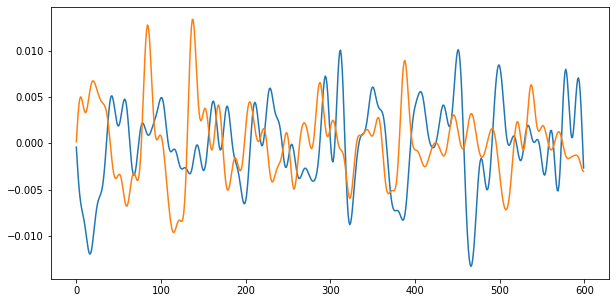

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(comp_ts[2400:3000, 0])
plt.plot(comp_ts[2400:3000, 1])

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.03910695, -0.04839649, -0.05765906, -0.06668462, -0.07529634,
        -0.08332712, -0.09058666, -0.09682707, -0.10171672, -0.10483107,
        -0.10566745, -0.10357715, -0.09815931, -0.08901133, -0.07593291,
        -0.0589973 , -0.03859584, -0.01544562,  0.00944421,  0.03484587,
         0.05941792]),
 <matplotlib.lines.Line2D at 0x168722a50>)

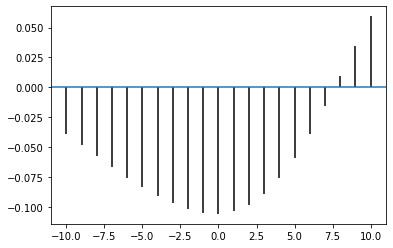

In [37]:
plt.xcorr(comp_ts[1200:2400,0], comp_ts[1200:2400,1])

# **2. Visualize Analysis Results on Brain Surface**

## 2.1 Plot PCA Solution

In [3]:
gifti_LR = load_gifti(['results/PCA.L.func.gii', 'results/PCA.R.func.gii'])
pca_L = np.array(gifti_LR[0].agg_data())
pca_R = np.array(gifti_LR[1].agg_data())

gifti_LR = load_gifti(['results/PCA_gs.L.func.gii', 'results/PCA_gs.R.func.gii'])
pca_L_gs = np.array(gifti_LR[0].agg_data())
pca_R_gs = np.array(gifti_LR[1].agg_data())

In [5]:
comps = 2
fps = []
fps_gs = []
for i in range(comps):
    brain = Brain("fsaverage4", "split", "inflated", views=['lat', 'med'], background='white')
    brain_gs = Brain("fsaverage4", "split", "inflated", views=['lat', 'med'], background='white')
    brain.add_data(pca_L[i,:], center=0, hemi='lh')
    brain.add_data(pca_R[i,:], center=0, hemi='rh')
    brain_gs.add_data(pca_L_gs[i,:], center=0, hemi='lh')
    brain_gs.add_data(pca_R_gs[i,:], center=0, hemi='rh')
    fp = f'results/static_pics/pca_component{i}.png'
    fp_gs = f'results/static_pics/pca_gs_component{i}.png'
    fps.append(fp)
    fps_gs.append(fp_gs)
    brain.save_image(fp)
    brain_gs.save_image(fp_gs)


In [6]:
ipyplot.plot_images(fps, ['Component 1', 'Component 2'], img_width=500)
ipyplot.plot_images(fps_gs, ['Component 1 - GS Removed', 'Component 2 - GS Removed'], img_width=500)\

## 2.2 Plot Complex PCA Solution

In [7]:
gifti_LR = load_gifti(['results/pca_complex_abs.L.func.gii', 'results/pca_complex_abs.R.func.gii'])
pca_L_abs = np.array(gifti_LR[0].agg_data())
pca_R_abs = np.array(gifti_LR[1].agg_data())

gifti_LR = load_gifti(['results/pca_complex_ang.L.func.gii', 'results/pca_complex_ang.R.func.gii'])
pca_L_ang = np.array(gifti_LR[0].agg_data())
pca_R_ang = np.array(gifti_LR[1].agg_data())

### 2.2.1 Plot Absolute Magnitude of Complex PCA Comps

In [8]:
comps = 2
fps = []
for i in range(comps):
    brain = Brain("fsaverage4", "split", "inflated", views=['lat', 'med'], background='white')
    brain.add_data(pca_L_abs[i,:], center=0, hemi='lh')
    brain.add_data(pca_R_abs[i,:], center=0, hemi='rh')
    fp = f'results/static_pics/pca_complex_abs_component{i}.png'
    fps.append(fp)
    brain.save_image(fp)


In [9]:
ipyplot.plot_images(fps, ['Component 1 - Magnitude Weights - Complex PCA', 
                          'Component 2 - Magnitude Weights - Complex PCA'], img_width=500)

## 2.2.2 Plot Phase Angle of Complex PCA Comps

In [17]:
comps = 2
fps = []
for i in range(comps):
    brain = Brain("fsaverage4", "split", "inflated", views=['lat', 'med'], background='white')
    brain.add_data(pca_L_ang[i,:], hemi='lh', colormap='hsv')
    brain.add_data(pca_R_ang[i,:], hemi='rh', colormap='hsv')
    fp = f'results/static_pics/pca_complex_ang_component{i}.png'
    fps.append(fp)
    brain.save_image(fp)


In [18]:
ipyplot.plot_images(fps, ['Component 1 - Phase Angle - Complex PCA', 
                          'Component 2 - Phase Angle - Complex PCA'], img_width=500)